<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Codigos/EDO_PVI_OutrosMetodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Crank-Nicolson

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def metodo_crank_nicolson(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos a serem dados
    # h = tamanho do passo
    # Requer a função getR(y,x) e getdR(y,x)

    # Inicializar os vetores de saída para x e y
    x = np.zeros(n)
    y = np.zeros(n)

    # Definir condição iniciais do PVI e tolerância
    x[0] = x0
    y[0] = y0
    tol = 1e-8

    for i in range(0,n-1):

        # Inicializar contador e chute inicial para y[i+1] (Método de Continuação de Ordem Zero)
        k = 0
        y[i+1] = y[i]
        x[i+1] = x[i] + h

        # Calcular f e df do Método de Crank-Nicolson no chute inicial de y[i+1]
        R = y[i+1]-y[i]-(h/2)*(getf(x[i], y[i])+getf(x[i+1], y[i+1]))
        dR = 1-(h/2)*getdf(x[i+1], y[i+1])

        # Fazer iterações de Newton até convergir y[i+1]
        while abs(R) > tol:
            # Atualizar y[i+1] pelo Método de Newton
            y[i+1] = y[i+1] - R / dR

            # Atualizar o contador de Newton e os valores de f e df
            k = k + 1
            R = y[i+1]-y[i]-(h/2)*(getf(x[i], y[i])+getf(x[i+1], y[i+1]))
            dR = 1-(h/2)*getdf(x[i+1], y[i+1])

    return x, y



---


**Exemplo:** Resolva a EDO $\frac{dy}{dt}=t^2\sqrt{y}$ com condição inicial $y(0)=1$ usando o Método de Crank-Nicolson.


---



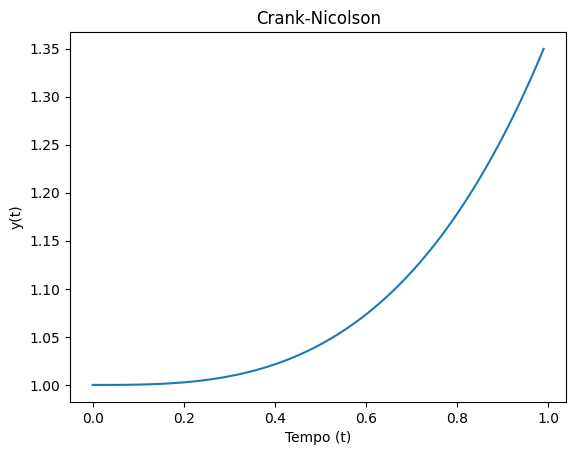

In [53]:
# Definir a função f(y,t)
def getf(t,y):
    f = (t**2)*(y**0.5)
    return f

# Definir a derivada de f(y,t)
def getdf(t,y):
    df = 0.5*(t**2)*(y**(-0.5))
    return df

t0 = 0      # Escolher o instante inicial
y0 = 1      # Definir a condição inicial
n = 100     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função do Método de Crank-Nicolson
t, yCN = metodo_crank_nicolson(t0, y0, n, h)

# Plotar os resultados
plt.plot(t,yCN)
plt.title('Crank-Nicolson')
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.show()

# Método de Predição-Correção (Heun)

Este também é um Método de Runge-Kutta de 2a Ordem.

In [42]:
import numpy as np

def metodo_heun(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y,x)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Predizer o valor de y usando Euler Explícito
        yp = y[i] + h * getf(x[i], y[i])

        # Corrigir o valor de y usando Euler "Implícito"
        yc = y[i] + h * getf(x[i]+h, yp)

        # Atualizar y[i+1] como a média da predição-correção
        y[i+1] = (yp+yc)/2

        x[i+1] = x[i] + h                    # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y

# A função getf(x, y) deve ser definida em algum lugar do seu código.
# Ela representa a função f(x, y) no contexto do problema do valor inicial.



---


**Exemplo:** Resolva a EDO $\frac{dy}{dt}=t^2\sqrt{y}$ com condição inicial $y(0)=1$ usando o Método de Heun (Predição-Correção).


---



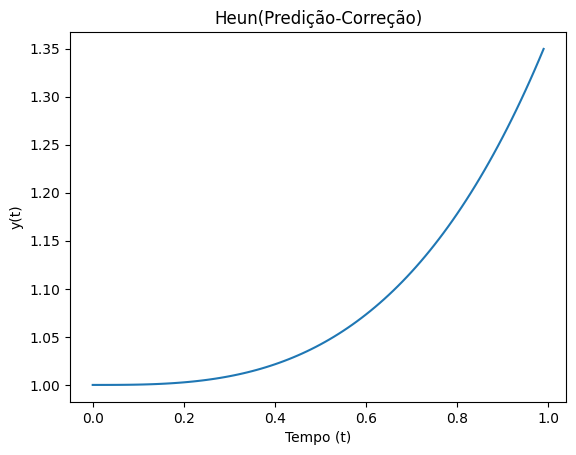

In [52]:
import matplotlib.pyplot as plt

# Definir a função f(y,t)
def getf(t,y):
    f = (t**2)*(y**0.5)
    return f

t0 = 0      # Escolher o instante inicial
y0 = 1      # Definir a condição inicial
n = 100     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função do Método de Euler Explícito
t, yheun = metodo_heun(t0, y0, n, h)

# Plotar os resultados
plt.plot(t,yheun)
plt.title('Heun(Predição-Correção)')
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.show()

# Método do Ponto Médio (RK 2a Ordem)

In [19]:
import numpy as np

def metodo_ponto_medio(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y,x)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Calcular o ponto médio
        xm = x[i] + h/2
        ym = y[i] + (h/2)*getf(x[i],y[i])

        # Atualizar y[i+1] com base no ponto médio
        y[i+1] = y[i] + h * getf(xm,ym)

        x[i+1] = x[i] + h   # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y

# A função getf(x, y) deve ser definida em algum lugar do seu código.
# Ela representa a função f(x, y) no contexto do problema do valor inicial.



---


**Exemplo:** Resolva a EDO $\frac{dy}{dt}=t^2\sqrt{y}$ com condição inicial $y(0)=1$ usando o Método do Ponto Médio.


---



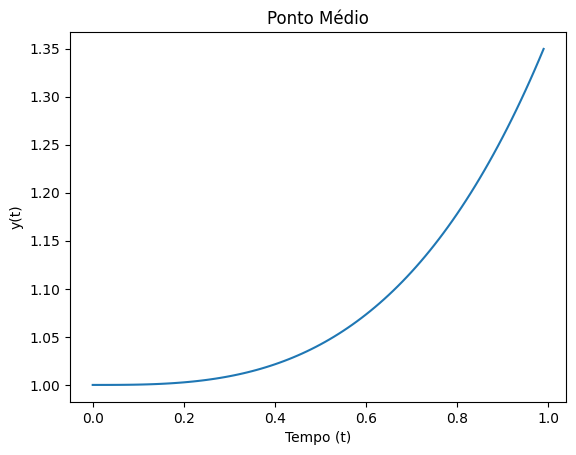

In [51]:
import matplotlib.pyplot as plt

# Definir a função f(y,t)
def getf(t,y):
    f = (t**2)*(y**0.5)
    return f

t0 = 0      # Escolher o instante inicial
y0 = 1      # Definir a condição inicial
n = 100     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função do Método de Euler Explícito
t, ymedio = metodo_ponto_medio(t0, y0, n, h)

# Plotar os resultados
plt.plot(t,ymedio)
plt.title('Ponto Médio')
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.show()

# Método de Runge-Kutta (4a ordem)

In [27]:
import numpy as np

def metodo_Runge_Kutta(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y,x)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Avaliar as funções de Runge-Kutta
        k1 = getf(x[i],y[i])
        k2 = getf(x[i] + h/2, y[i] + h*k1/2)
        k3 = getf(x[i] + h/2, y[i] + h*k2/2)
        k4 = getf(x[i] + h  , y[i] + h*k3)

        # Atualizar y[i+1] pela média ponderada
        y[i+1] = y[i] + (h/6) *(k1 + 2*k2 + 2*k3 + k4)

        x[i+1] = x[i] + h   # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y

# A função getf(x, y) deve ser definida em algum lugar do seu código.
# Ela representa a função f(x, y) no contexto do problema do valor inicial.



---


**Exemplo:** Resolva a EDO $\frac{dy}{dt}=t^2\sqrt{y}$ com condição inicial $y(0)=1$ usando o Método de Runge Kutta 4a Ordem.


---



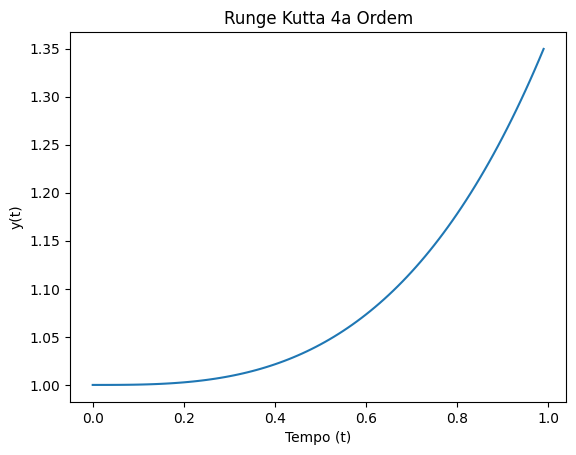

In [50]:
import matplotlib.pyplot as plt

# Definir a função f(y,t)
def getf(t,y):
    f = (t**2)*(y**0.5)
    return f

t0 = 0      # Escolher o instante inicial
y0 = 1      # Definir a condição inicial
n = 100     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função do Método de Euler Explícito
t, yRK4 = metodo_Runge_Kutta(t0, y0, n, h)

# Plotar os resultados
plt.plot(t,yRK4)
plt.title('Runge Kutta 4a Ordem')
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.show()